In [1]:
# Required Packages 
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import iris data to model Svm classifier (3 points)
iris=load_iris()

In [3]:
# Using the DESCR key over the iris_dataset to describ the dataset (3 points)
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [4]:
# To get the iris features and the target classes (3 points)
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# To check the target data (3 points)
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Convert this dataset to a dataframe in pandas

In [6]:
df=pd.DataFrame(iris['data'],columns=['Petal length','Petal Width','Sepal Length','Sepal Width'])
df['Species']=iris['target']
df.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.shape

(150, 5)

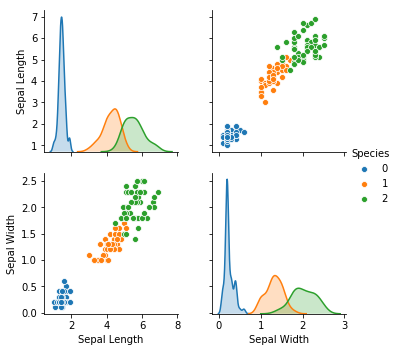

In [8]:
sns.pairplot(data=df,x_vars=["Sepal Length", "Sepal Width"],
              y_vars=["Sepal Length", "Sepal Width"],hue='Species')
plt.show()

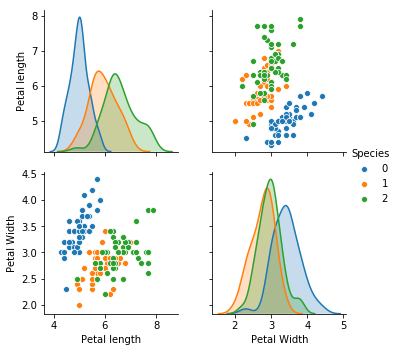

In [9]:
sns.pairplot(data=df,x_vars=["Petal length", "Petal Width"],
              y_vars=["Petal length", "Petal Width"],hue='Species')
plt.show()

In [10]:
x=iris.data[:, 2:4] 
y=iris.target

**rbf**

In [11]:
svm_rbf=SVC(kernel='rbf')
rbf=svm_rbf.fit(x,y)

**linear**

In [12]:
svm_linear=SVC(kernel='linear')
linear=svm_linear.fit(x,y)

**Polynomial**

In [13]:
svm_poly=SVC(kernel='poly',degree=3)
poly=svm_poly.fit(x,y)
#poly_preds=svm_poly.predict(X)

In [14]:
x_min, x_max = x.min() - 1, x.max() + 1
y_min, y_max = y.min() - 1, y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [15]:
def contours(ax, svm, xx, yy, **params):
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    con = ax.contourf(xx, yy, Z, **params)
    return con

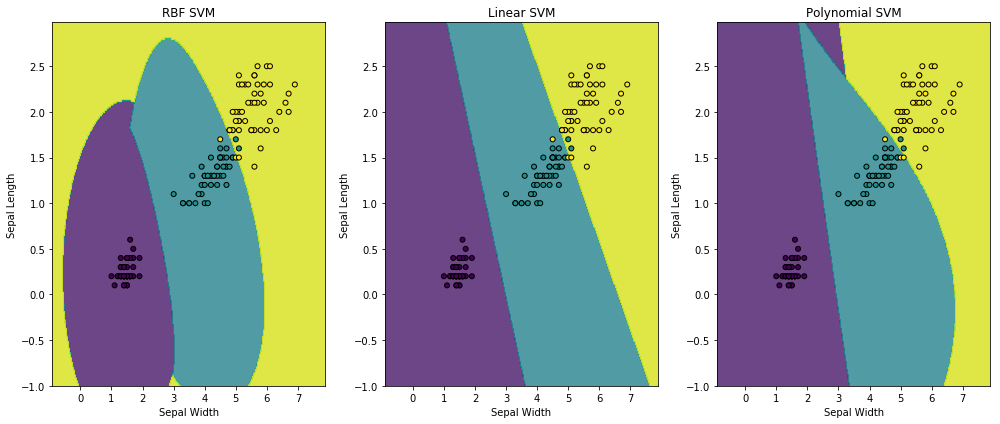

In [16]:
fig, ax = plt.subplots(figsize=(14,6),nrows=1,ncols=3)

contours(ax[0], rbf, xx, yy, alpha=0.8)
ax[0].scatter(x[:,0], x[:,1], c=y, s=25, edgecolors='k')
ax[0].set_title('RBF SVM')
ax[0].set_xlabel('Sepal Width')
ax[0].set_ylabel('Sepal Length')


contours(ax[1], linear, xx, yy, alpha=0.8)
ax[1].scatter(x[:,0], x[:,1], c=y, s=25, edgecolors='k')
ax[1].set_title('Linear SVM')
ax[1].set_xlabel('Sepal Width')
ax[1].set_ylabel('Sepal Length')


contours(ax[2], poly, xx, yy, alpha=0.8)
ax[2].scatter(x[:,0], x[:,1], c=y,s=25, edgecolors='k')
ax[2].set_title('Polynomial SVM')
ax[2].set_xlabel('Sepal Width')
ax[2].set_ylabel('Sepal Length')

plt.tight_layout()

In [17]:
rbf_preds=rbf.predict(x)
lr_preds=linear.predict(x)
poly_preds=poly.predict(x)

In [18]:
print('rbf based precision: ',accuracy_score(y,rbf_preds))
print('linear based precision: ',accuracy_score(y,lr_preds))
print('polynomial based precision: ',accuracy_score(y,poly_preds))

rbf based precision:  0.9666666666666667
linear based precision:  0.9666666666666667
polynomial based precision:  0.96


In [19]:
x=iris.data[:, 0:2] 
y=iris.target

In [20]:
x_min, x_max = x.min() - 1, x.max() + 1
y_min, y_max = y.min() - 1, y.max() + 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [21]:
svm_rbf=SVC(kernel='rbf')
rbf=svm_rbf.fit(x,y)

In [22]:
svm_linear=SVC(kernel='linear')
linear=svm_linear.fit(x,y)

In [23]:
svm_poly=SVC(kernel='poly',degree=3)
poly=svm_poly.fit(x,y)

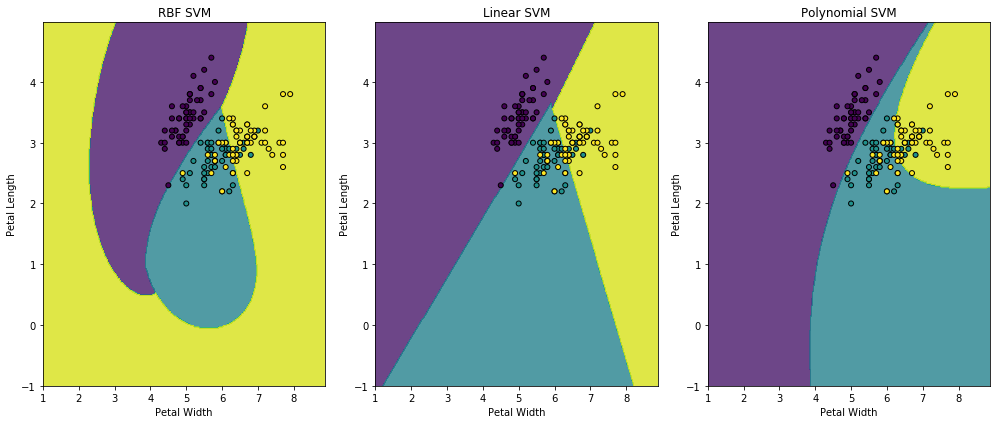

In [24]:
fig, ax = plt.subplots(figsize=(14,6),nrows=1,ncols=3)

contours(ax[0], rbf, xx, yy, alpha=0.8)
ax[0].scatter(x[:,0], x[:,1], c=y, s=25, edgecolors='k')
ax[0].set_title('RBF SVM')
ax[0].set_xlabel('Petal Width')
ax[0].set_ylabel('Petal Length')


contours(ax[1], linear, xx, yy, alpha=0.8)
ax[1].scatter(x[:,0], x[:,1], c=y, s=25, edgecolors='k')
ax[1].set_title('Linear SVM')
ax[1].set_xlabel('Petal Width')
ax[1].set_ylabel('Petal Length')


contours(ax[2], poly, xx, yy, alpha=0.8)
ax[2].scatter(x[:,0], x[:,1], c=y,s=25, edgecolors='k')
ax[2].set_title('Polynomial SVM')
ax[2].set_xlabel('Petal Width')
ax[2].set_ylabel('Petal Length')

plt.tight_layout()

In [25]:
rbf_preds=rbf.predict(x)
lr_preds=linear.predict(x)
poly_preds=poly.predict(x)

In [26]:
print('rbf based precision: ',accuracy_score(y,rbf_preds))
print('linear based precision: ',accuracy_score(y,lr_preds))
print('polynomial based precision: ',accuracy_score(y,poly_preds))

rbf based precision:  0.8266666666666667
linear based precision:  0.82
polynomial based precision:  0.8133333333333334
